In [2]:
# libraries
import os
import pandas as pd
import pylab as pl
import numpy as np
import wget
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import scipy.optimize as opt

from sklearn import *


# from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

from sklearn.metrics import cohen_kappa_score, jaccard_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score, jaccard_score
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

from IPython.display import Image
# from sklearn.externals.six import StringIO

from sklearn.metrics import r2_score

import wget

In [3]:
### working with the data

# downloading the data
wget.download(url= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')



100% [..............................................................................] 72629 / 72629

'FuelConsumptionCo2 (3).csv'

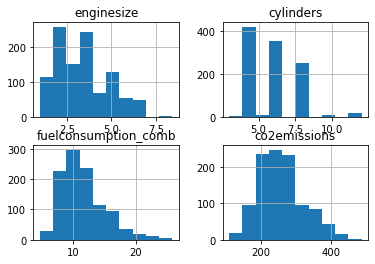

<Figure size 432x288 with 0 Axes>

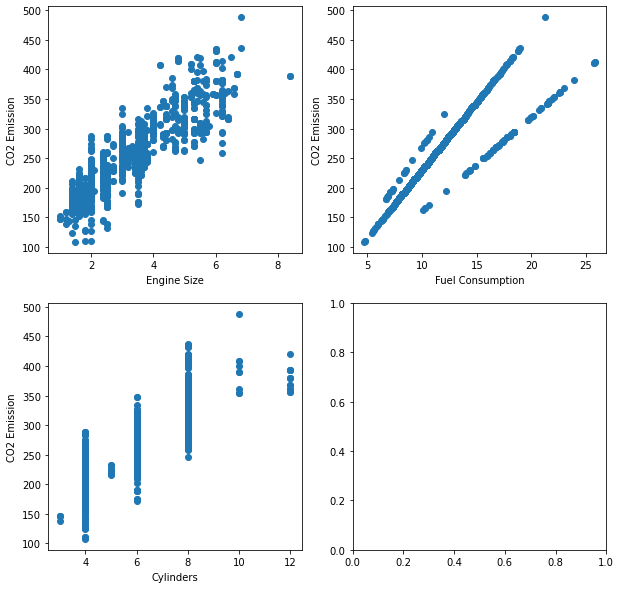

   enginesize  cylinders  fuelconsumption_comb  co2emissions
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
   enginesize
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   co2emissions
0           196
1           221
2           136
3           255
4           244
Inercept:  [124.77059523]
Coeffs:  [[39.4153746]]
Mean Absolute error (MAE): 
co2emissions    23.206542
dtype: float64

Mean Square error (MSE): 
co2emissions    955.370765
dtype: float64

R2 score: 
0.7128261218614981


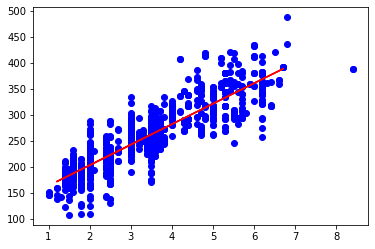

In [5]:
# read the data
emiss_data = pd.read_csv('FuelConsumption.csv')
emiss_data.head()
# data exploration
emiss_data.describe()
# make all columns lowercase for easiness
emiss_data.columns = list   (  map( lambda x:x.lower(), emiss_data.columns )   )
emiss_data.head()

## X_y vars
X_y = emiss_data[  [ 'enginesize', 'cylinders', 'fuelconsumption_comb','co2emissions' ]  ]
X_y.head()
# histogram
X_y.hist()
plt.show()
X_y.head()

## plot
# plot each of these features vs the CO2Emission, to see how linear is their relation
scat_figr = plt.figure()
scat_figr, axes = plt.subplots(nrows= 2, ncols= 2, figsize = (10,10))


axes[0][0].scatter(  X_y['enginesize'], X_y['co2emissions']  )
axes[0][0].set_xlabel('Engine Size', labelpad = 5); axes[0][0].set_ylabel('CO2 Emission', labelpad = 5)

axes[0][1].scatter(  X_y['fuelconsumption_comb'], X_y['co2emissions'] )
axes[0][1].set_xlabel('Fuel Consumption', labelpad = 5); axes[0][1].set_ylabel('CO2 Emission', labelpad = 5)

axes[1][0].scatter( X_y['cylinders'] , X_y['co2emissions'])
axes[1][0].set_xlabel('Cylinders', labelpad = 5); axes[1][0].set_ylabel('CO2 Emission', labelpad = 5)
plt.show()

## create train n test dataset
print(X_y.head())

X = X_y[['enginesize']]
y = X_y[['co2emissions']]


print(X.head()); print(y.head())

### modeling

# separate X and y train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.20, random_state= 1)
# simple linear regression model
from sklearn import linear_model
slr_model = linear_model.LinearRegression() 
slr_model.fit(X_train, y_train)

#  modeling parameters
print('Inercept: ', slr_model.intercept_)
print('Coeffs: ', slr_model.coef_)

# y_hat
#approach 1
estimated_y1 = slr_model.predict(X_test)

#approach 2 - use the modelled equation - rigid way
estimated_y2 = slr_model.intercept_ + slr_model.coef_[0][0] * X_train

# plotting fit line over the data
plt.scatter(x= X, y= y, color = 'blue' )
plt.plot(X_test, estimated_y1, '-r')

## model evaluation
from sklearn.metrics import r2_score
y_hat = estimated_y1

print('Mean Absolute error (MAE): ') ; print(  np.mean(np.absolute(y_hat-y_test))  )
print('\nMean Square error (MSE): ') ; print(  np.mean((y_hat-y_test)**2)  )
print('\nR2 score: '); print( r2_score(y_hat, y_test) )

In [6]:
y_hat = estimated_y1

print('Mean Absolute error (MAE): ') ; print(  np.mean(np.absolute(y_hat-y_test))  )
print('\nMean Square error (MSE): ') ; print(  np.mean((y_hat-y_test)**2)  )
print('\nR2 score: '); print( r2_score(y_hat, y_test) )

Mean Absolute error (MAE): 
co2emissions    23.206542
dtype: float64

Mean Square error (MSE): 
co2emissions    955.370765
dtype: float64

R2 score: 
0.7128261218614981


In [ ]:
### Multiple Regression Model

In [7]:
print(X_y.head())

X = X_y.drop('co2emissions', axis= 1); print(X.head())
y = X_y[['co2emissions']]; print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.20, random_state= 1)
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X_train, y_train)

# coefficients
print('Inercept: ', mlr_model.intercept_)
print('Coeffs: ', mlr_model.coef_)

# prediction
estimated_y = mlr_model.predict(X_test)
y_hat = estimated_y

# model evaluation
from sklearn.metrics import r2_score
y_hat = estimated_y

print('Mean Absolute error (MAE): ')
print(  np.mean(np.absolute(y_hat-y_test))  )

print('\nMean Square error (MSE): ')
print(  np.mean((y_hat-y_test)**2)  )

print('\nR2 score: ')
print( r2_score(y_hat, y_test) )

print("\nVariance Score: ")
print( mlr_model.score(X_test, y_test))


# variance Score = 1 - Var(y-y_hat)/var(y)  | Variance score = 1 --> good model, = 0 --> bad model

   enginesize  cylinders  fuelconsumption_comb  co2emissions
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
   enginesize  cylinders  fuelconsumption_comb
0         2.0          4                   8.5
1         2.4          4                   9.6
2         1.5          4                   5.9
3         3.5          6                  11.1
4         3.5          6                  10.6
   co2emissions
0           196
1           221
2           136
3           255
4           244
Inercept:  [65.17950048]
Coeffs:  [[11.56295409  6.91231122  9.72527271]]
Mean Absolute error (MAE): 
co2emissions    16.646828
dtype: float64

Mean Square error (MSE): 
co2emissions    546.25914
dtype: float64

R2 score: 
0.8538348878208784

Variance Scor

In [ ]:
### Polynomial Regression Model

   enginesize  cylinders  fuelconsumption_comb  co2emissions
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
   enginesize
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   co2emissions
0           196
1           221
2           136
3           255
4           244
----------------------------------------------------------
      enginesize
56           3.0
301          6.4
992          2.5
893          4.8
54           4.0
...          ...
847          1.6
715          2.5
905          4.8
235          2.4
1061         3.2

[853 rows x 1 columns]
[[ 1.    3.    9.  ]
 [ 1.    6.4  40.96]
 [ 1.    2.5   6.25]
 ...
 [ 1.    4.8  23.04]
 [ 1.    2.4   5.76]
 [ 1.    3.2  10.24]]
-----------------------------------

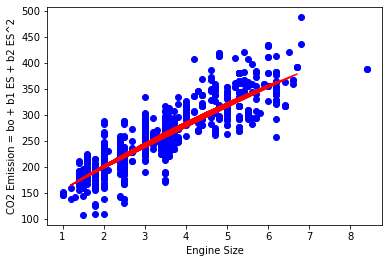

In [10]:
# train/test dataset
print(X_y.head())

X = X_y[['enginesize']]; print(X.head())
y = X_y[['co2emissions']]; print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.20, random_state= 1)
# import libs
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# model
p_model = PolynomialFeatures(degree= 2)

# fit_transform
X_train_poly = p_model.fit_transform(X_train)
print('----------------------------------------------------------')
print(X_train)
print(X_train_poly)

# multiple regression
pmlr_model = linear_model.LinearRegression()
pmlr_model.fit(X_train_poly, y_train)

# coefficients
print('----------------------------------------------------------')
print('Inercept: ', pmlr_model.intercept_)
print('Coeffs: ', pmlr_model.coef_)

## two approaches to estimate y_hat, and both yield same result
# converting X_test as higher order (as was done for X_train)
print(X_test.head())
X_test_poly = p_model.fit_transform(X_test)
print(X_test_poly[:6, :])

# y estimation
estimated_y1 = pmlr_model.predict( X_test_poly )

estimated_y2 = pmlr_model.intercept_[0] + pmlr_model.coef_[0][1] * X_test_poly[ :, 1] + \
                                          pmlr_model.coef_[0][2] * X_test_poly[ :, 2]
## confirm both are same/equal
print( (estimated_y1 - estimated_y2).sum() )
y_hat = estimated_y1

# plotting fit line(curve) over the data
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_test, y_hat, '-r')

plt.xlabel('Engine Size'); plt.ylabel('CO2 Emission = bo + b1 ES + b2 ES^2')

# Model eval
from sklearn.metrics import r2_score
print('---------------------------Model Evaluation-------------------------------')
print('Mean Absolute error (MAE): ') ; print(  np.mean(np.absolute(y_hat-y_test))  )
print('\nMean Square error (MSE): ') ; print(  np.mean((y_hat-y_test)**2)  )
print('\nR2 score: '); print( r2_score(y_hat, y_test) )